In [1]:
import pandas as pd
import numpy as np

In [47]:
#read data
data = pd.read_csv("input//wine.data",header = None)
print("data shape:",data.shape)

data shape: (178, 14)


In [48]:
#add columns
data.columns = ['label','alcohol','malic acid','ash','alcalinity of ash','magnesium','total phenols','flavanoids','nonflavanoid phenols','proanthocyanins','color intensity','hue','OD280/OD315 of diluted wines','proline']

In [14]:
data.head(5)

,label,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
correlations = data.corr()

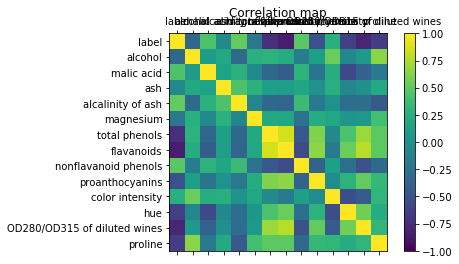

In [33]:
fig = plt.figure()
plt.title("Correlation map")
ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
names = data.columns
ticks = list(range(0,14))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [49]:
X_train = data.iloc[:,1:].values.astype('float32')
y_train = data.iloc[:,0].values.astype('int32')

In [50]:
#split data into train and validation
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,train_size=0.8,random_state=0)

In [52]:
#feature scaling
#standardization (z-score normalization)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_validation = std_scale.transform(X_validation)

In [37]:
cov_mat = np.cov(X_train.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
eigen_pairs = [(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key = lambda x:x[0], reverse=True)
total = sum(eigen_values)
ind_variance = [(i/total)*100 for i in sorted(eigen_values,reverse=True)]
cum_variance = np.cumsum(ind_variance)

In [39]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [54]:
trace1 = go.Scatter(x=list(range(13)),y=ind_variance,mode='lines+markers',name='Individual Explained Variance',hoverinfo=ind_variance,line=dict(color='goldenrod'))
trace2 = go.Scatter(x=list(range(13)),y=cum_variance,name='Cumulative Explained Variance',mode='lines+markers',hoverinfo=cum_variance,line=dict(color='black'))
fig = tls.make_subplots()
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,1)
fig.layout.xaxis = dict(title='Columns')
fig.layout.yaxis = dict(title='Explained Variance')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [45]:
from sklearn.decomposition import PCA
pca_std = PCA(n_components=8).fit(X_train)
X_train = pca_std.transform(X_train)
X_validation = pca_std.transform(X_validation)

In [53]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(X_train,y_train)
classifier.score(X_validation,y_validation)

1.0